![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


In [7]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


### Análisis descriptivo

Como se puede ver en las celdas anteriores, el invierno es la época del año en la que menos se rentan bicicletas en promedio, mientras que el verano es la época en la que más se rentan. Adicionalmente, las 5/6 de la tarde es la hora en la que más se rentan bicicletas, mientras que las 4 de la mañana es la hora en la que menos se rentan en promedio. El momento con más bicicletas rentadas han sido los veranos a las 6 de la tarde, con un acumulado de 977. En la base de datos no hay momentos en los que no se haya rentado ninguna bicicleta, pero el mínimo ha sido una.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

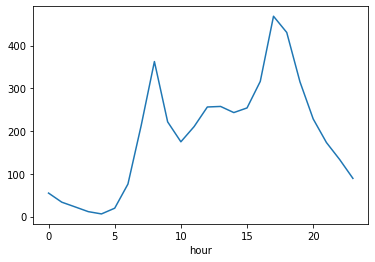

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

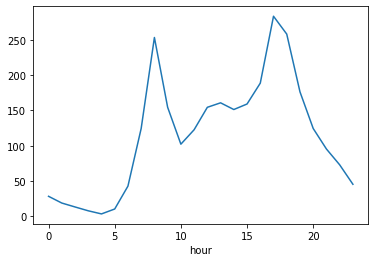

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
winter = bikes[bikes['season'] == 1]
winter.groupby('hour').total.mean().plot()

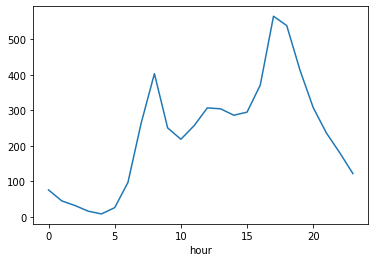

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
summer = bikes[bikes['season'] == 3]
summer.groupby('hour').total.mean().plot()

### Hallazgos

Como se puede ver en las gráficas, el comportamiento promedio de los usuarios que rentan bicicletas no cambia cuando cambian las estaciones ni es lineal. Tanto en invierno, como en verano, como en todo el año, los usuarios prefieren rentar bicicletas a las 5-6 de la tarde, mientras que evitan rentarlas a las 4 de la mañana. Esto implica que el momento del día en el que se renta una bicicleta no depende de la estación. Es decir, estas variables parecen ser independientes entre sí (no hay multicolinealidad). Sin embargo, si se ve puede ver que la estación si influye en la cantidad de bicicletas que se rentan, pues en invierno se rentan menos bicicletas en promedio. Finalmente, en general, la renta de bicicletas aumenta y disminuye a lo largo del día, lo que implica que no hay linealidad.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [110]:
# Celda 3
# Separación de variables predictoras (X) y variable de interes (y)
bikes_encoded = pd.get_dummies(bikes, columns=['season'])
X = bikes_encoded[['hour','season_2', 'season_3', 'season_4']]
y = bikes_encoded['total']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Calcular las predicciones en el conjunto de validación
y_pred = model.predict(X_val)
# Calcular métricas de desempeño del modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Imprimir los coeficientes
print("Intercepto:", model.intercept_)
print("Coeficientes de hour y season:", model.coef_)

# Imprimir métricas de desempeño del modelo
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Intercepto: -6.430262462305961
Coeficientes de hour y season: [ 10.54520609 100.31723192 119.46754995  84.08311787]
Error cuadrático medio (MSE): 25386.08153987355
Coeficiente de determinación (R^2): 0.230886452360323


### Interpretación

Según los resultados de la regresión lineal, cuando el día aumenta en una hora, se espera que el número de bicicletas rentadas aumente en 10, todo lo demás constante. Adicionalmente, en las temporadas primavera, verano y otoño, la renta de bicicletas aumenta en 100.3, 119.5 y 84.1 en promedio con respecto al invierno.

En este caso, las limitaciones de usar este modelo de regresión lineal es que el comportamiento de la hora del día parece no ser lineal, pues la renta de bicicletas aumenta hasta las 6 de la tarde, pero disminuye hasta las 4 de la mañana y luego vuelve a subir hasta las 7-8 de la mañana, para luego volver a bajar hasta las 10 de la mañana y finalmente subir hasta las 6 de la tarde nuevamente. Esto implica que el coeficiente de horas no es el más acertado. Por otro lado, el efecto que tienen las estaciones sobre el número de bicicletas rentadas podría interpretarse de mejor forma en un árbol de decisión, teniendo en cuenta los hallazgos anteriores.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [76]:
X = bikes[['hour','season']]
y = bikes['total']

In [88]:
# Impresión variable a usar (Hits)
j = 0
print(X.columns[j])

hour


In [89]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = 6
num_pct = 4
max_features = None
min_gain=0.001

In [90]:
# División de las variables en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, 0], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([ 0.,  6., 12., 18.])

In [94]:
# División de las observaciones usando el punto de corte en la posición 3 de la lista de splits
k=3
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [95]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [96]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

-63846.62163125448

In [97]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

-103984.50069492537

In [98]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [99]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

916.4067193765077

In [100]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [101]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

(0, 8.0, 18268.811823533004)

In [102]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [103]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [104]:
y.mean(), y_l.mean(), y_r.mean()

(191.57413191254824, 55.437673900946024, 258.6715578716402)

In [105]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [106]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 7207.700659959655},
 'sr': {'y_pred': 1,
  'y_prob': 258.6007677543186,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 7392.920792160614}}

In [107]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_pr

In [108]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [109]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [26]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = bikes[['hour','season']]
y = bikes['total']
# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicializar y entrenar el modelo de árbol de decisiones
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
# Calcular las predicciones en el conjunto de validación
y_pred = tree_reg.predict(X_val)
# Calcular métricas de desempeño del modelo
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Imprimir métricas de desempeño del modelo
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 13454.101382166964
Coeficiente de determinación (R^2): 0.5923856295785829


## Comentarios sobre desempeño
Considerando que el MSE del modelo del punto 3 fue 25386 y su R2 fue de 0.23, podemos concluir que el árbol de decisión tiene un desempeño mucho mejor con una mejor bondad de ajuste y un error cuadrático medio menor (MSE = 13454.1, R2=0.59).

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [45]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [46]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [47]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [56]:
# Celda 6
from sklearn.linear_model import LogisticRegression
##Arbol de decision
tree_clf = DecisionTreeClassifier(random_state=1)
#Calibración
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(tree_clf, n_estimators=10, 
                          bootstrap=True, oob_score=True, random_state=1)
# Entrenemiento del modelo con set de entrenamiento y predicción en el set de test
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
y_pred
##Reg logistica
# Entrenar la regresión logística
log_reg = LogisticRegression(max_iter=10)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [57]:
# Calcular métricas de desempeño
from sklearn.metrics import accuracy_score, f1_score
accuracy_tree = accuracy_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Árbol de Decisión:")
print("Accuracy:", accuracy_tree)
print("F1-Score:", f1_tree)

print("\nRegresión Logística:")
print("Accuracy:", accuracy_log_reg)
print("F1-Score:", f1_log_reg)

Árbol de Decisión:
Accuracy: 0.618
F1-Score: 0.5910064239828694

Regresión Logística:
Accuracy: 0.5713333333333334
F1-Score: 0.5592871830020562


### Interpretación

Como se puede ver, la evaluación de ambos modelos muestran que tienen un desempeño muy similar pues sus valores de Accuracy y F1 son casi iguales. De hecho, la regresión logística es un poco mejor, por lo que aún hay espacio para mejorar el modelo del árbol de decisión.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [50]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Crear modelos individuales
tree_clf1 = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
log_reg = LogisticRegression(max_iter=10)

# Crear ensamble de modelos
ensemble = VotingClassifier(estimators=[
    ('tree1', BaggingClassifier(tree_clf1, n_estimators=100, random_state=1)),
    ('tree2', BaggingClassifier(tree_clf2, n_estimators=100, random_state=1)),
    ('log_reg', BaggingClassifier(log_reg, n_estimators=100, random_state=1))
], voting='hard')

In [51]:
# Entrenar modelos individuales
tree_clf1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [52]:
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [53]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# Entrenar ensamble
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('tree1',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=5,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
          

In [55]:
# Realizar predicciones
y_pred_tree1 = tree_clf1.predict(X_test)
y_pred_tree2 = tree_clf2.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Evaluar modelos individuales
accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)
f1_tree1 = f1_score(y_test, y_pred_tree1)

accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_tree2 = f1_score(y_test, y_pred_tree2)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Evaluar ensamble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

# Imprimir métricas de desempeño
print("Árbol de decisión 1:")
print("Accuracy:", accuracy_tree1)
print("F1-Score:", f1_tree1)

print("\nÁrbol de decisión 2:")
print("Accuracy:", accuracy_tree2)
print("F1-Score:", f1_tree2)

print("\nRegresión Logística:")
print("Accuracy:", accuracy_log_reg)
print("F1-Score:", f1_log_reg)

print("\nEnsamble:")
print("Accuracy:", accuracy_ensemble)
print("F1-Score:", f1_ensemble)

Árbol de decisión 1:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Árbol de decisión 2:
Accuracy: 0.542
F1-Score: 0.5459352280237937

Regresión Logística:
Accuracy: 0.5713333333333334
F1-Score: 0.5592871830020562

Ensamble:
Accuracy: 0.658
F1-Score: 0.6559356136820926


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [58]:
# Celda 8
# Crear modelos individuales
tree_clf1 = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
log_reg = LogisticRegression(max_iter=10)

# Crear ensamble de modelos con votación ponderada
ensemble_weighted = VotingClassifier(estimators=[
    ('tree1', BaggingClassifier(tree_clf1, n_estimators=100, random_state=1, oob_score=True)),
    ('tree2', BaggingClassifier(tree_clf2, n_estimators=100, random_state=1, oob_score=True)),
    ('log_reg', BaggingClassifier(log_reg, n_estimators=100, random_state=1, oob_score=True))
], voting='soft', weights=None)  # Inicialmente sin pesos

# Entrenar ensamble para obtener los errores OOB
ensemble_weighted.fit(X_train, y_train)

# Obtener los errores OOB para cada modelo
oob_errors = [1 - estimator.oob_score_ for estimator in ensemble_weighted.estimators_]

# Calcular los pesos basados en los errores OOB
weights = [1 / (1 + error) for error in oob_errors]

# Asignar los pesos al ensamble
ensemble_weighted.weights = weights

# Realizar predicciones
y_pred_ensemble_weighted = ensemble_weighted.predict(X_test)

# Evaluar ensamble ponderado
accuracy_ensemble_weighted = accuracy_score(y_test, y_pred_ensemble_weighted)
f1_ensemble_weighted = f1_score(y_test, y_pred_ensemble_weighted)

# Imprimir métricas de desempeño
print("Ensamble con votación ponderada:")
print("Accuracy:", accuracy_ensemble_weighted)
print("F1-Score:", f1_ensemble_weighted)

Ensamble con votación ponderada:
Accuracy: 0.6566666666666666
F1-Score: 0.656437625083389


In [60]:
# Entrenar modelos individuales
tree_clf1.fit(X_train, y_train)
tree_clf2.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Hacer predicciones con cada modelo individual
y_pred_tree1 = tree_clf1.predict(X_test)
y_pred_tree2 = tree_clf2.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calcular métricas de rendimiento para cada modelo individual
accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)
f1_tree1 = f1_score(y_test, y_pred_tree1)

accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_tree2 = f1_score(y_test, y_pred_tree2)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Hacer predicciones con el ensamble ponderado
y_pred_ensemble_weighted = ensemble_weighted.predict(X_test)

# Calcular métricas de rendimiento para el ensamble ponderado
accuracy_ensemble_weighted = accuracy_score(y_test, y_pred_ensemble_weighted)
f1_ensemble_weighted = f1_score(y_test, y_pred_ensemble_weighted)

# Imprimir métricas de rendimiento para cada modelo individual y el ensamble ponderado
print("Árbol de decisión 1:")
print("Accuracy:", accuracy_tree1)
print("F1-Score:", f1_tree1)
print("\nÁrbol de decisión 2:")
print("Accuracy:", accuracy_tree2)
print("F1-Score:", f1_tree2)
print("\nRegresión Logística:")
print("Accuracy:", accuracy_log_reg)
print("F1-Score:", f1_log_reg)
print("\nEnsamble Ponderado:")
print("Accuracy:", accuracy_ensemble_weighted)
print("F1-Score:", f1_ensemble_weighted)

Árbol de decisión 1:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Árbol de decisión 2:
Accuracy: 0.542
F1-Score: 0.5459352280237937

Regresión Logística:
Accuracy: 0.5713333333333334
F1-Score: 0.5592871830020562

Ensamble Ponderado:
Accuracy: 0.6566666666666666
F1-Score: 0.656437625083389


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
En ambos casos, el mejor modelo fue el árbol de decisión 2. El ensamble ponderado tuvo un peor desempeño que este modelo en ambos casos. Comparando votación ponderada y mayoritaría, se puede ver que la votación ponderada dio mejores resultados en términos de las métricas F1 y Accuracy, sin embargo la diferencia es mínima. El árbol de decisión del punto 6 tuvo mejores resultados.

Con respecto a ventajas y desventajas, la votación ponderada puede ser más flexible y tener un mejor rendimiento en comparación con la votación mayoritaria, especialmente cuando los modelos individuales tienen habilidades predictivas variadas en diferentes regiones del espacio de características. Sin embargo, este modelo tiene riesgo de sobreajuste al requerir más calibración. La votación mayoritaria es más simple y directa de implementar. Se debe tener en cuenta que se usaron pocas iteraciones en la regresión logística debido al requerimiento computacional del ensamblaje (estaba tardando mucho en correr).